# Physical activity and sleep field categories are covered here

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import utils as ut
from scipy import stats


In [2]:
sns.set_style("dark", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("paper")
sns.set(font_scale = 1.5)

In [3]:
lifestyle_file = "/data5/deepro/ukbiobank/analysis/lifestyle_factors/data/lifestyle_v2.xlsx"
store_dir = "/data5/deepro/ukbiobank/preprocess/rarecomb_pheno_prepare/data"
lifestyle_df = pd.read_excel(lifestyle_file)

In [4]:
int_df = ut.get_integer_factors(lifestyle_df, store_dir)
cat_single_df = ut.get_catsingle_factors(lifestyle_df, store_dir)
cat_multiple_df = ut.get_catmultiple_factors(lifestyle_df, store_dir)

In [15]:
# Number of days/week walked or moderate or severe physical activity 10+ minutes - frequency
physical_activity_integer_frequency = [864, 884, 904]

# Duration of walks or moderate or vigorous activity - duration
physical_activity_integer_duration = [874, 894, 914]

# Time spent watching tv, on computer or driving - miscellaneous
physical_activity_integer_miscellaneous = [1070, 1080, 1090]

# Sleep duration - sleep
physical_activity_integer_sleep = [1160]

# frequency and duration of diy last four months - diy
physical_activity_catsingle_diy = [1011, 1021, 2624, 2634]

# frequency of strenuous or other exercises last four months - sports_frequency
physical_activity_catsingle_sports_frequency = [991, 3637]

# duration of strenuous or other exercises last four months - sports_duration
physical_activity_catsingle_sports_duration = [1001, 3647]

# usual walking pace, stair climbing - regular
physical_activity_catsingle_regular = [924, 943]

# usual walking pleasure - pleasure
physical_activity_catsingle_pleasure = [971, 981]

# Sleep pattern morning - sleep morning
physical_activity_catsingle_sleep_morning = [1170, 1180]

# Sleep pattern napping/dozing - sleep nap
physical_activity_catsingle_sleep_nap = [1190, 1220]

# Sleep pattern snoring - sleep snore
physical_activity_catsingle_sleep_snore = [1210]

# Sleep pattern insomnia - sleep insomnia
physical_activity_catsingle_sleep_insomnia = [1200]

# Checking for correlation

In [10]:
int_df.loc[:, physical_activity_integer_frequency + physical_activity_integer_duration + physical_activity_integer_miscellaneous].corr()

,864,884,904,874,894,914,1070,1080,1090
864,1.000000,0.374659,0.232878,0.248875,0.142071,0.081962,-0.046755,-0.081861,-0.062930
884,0.374659,1.000000,0.491470,0.230736,0.304630,0.123322,-0.048962,-0.060438,-0.004564
904,0.232878,0.491470,1.000000,0.158547,0.208951,0.204060,-0.085376,-0.016353,0.034243
874,0.248875,0.230736,0.158547,1.000000,0.453012,0.264365,0.008659,-0.055654,0.041746
894,0.142071,0.304630,0.208951,0.453012,1.000000,0.357167,0.027083,-0.055468,0.037402
914,0.081962,0.123322,0.204060,0.264365,0.357167,1.000000,0.021538,-0.017791,0.049467
1070,-0.046755,-0.048962,-0.085376,0.008659,0.027083,0.021538,1.000000,0.010216,0.037242
1080,-0.081861,-0.060438,-0.016353,-0.055654,-0.055468,-0.017791,0.010216,1.000000,0.150534
1090,-0.062930,-0.004564,0.034243,0.041746,0.037402,0.049467,0.037242,0.150534,1.000000


In [16]:
cat_single_df.loc[:, physical_activity_catsingle_diy].corr()

,1011,1021,2624,2634
1011,1.000000,0.249445,0.541567,0.158061
1021,0.249445,1.000000,0.257403,0.456952
2624,0.541567,0.257403,1.000000,0.321765
2634,0.158061,0.456952,0.321765,1.000000


In [12]:
cat_single_df.loc[:, physical_activity_catsingle_pace + physical_activity_catsingle_frequency + physical_activity_catsingle_duration].corr()

,924,943,971,991,1011,2624,3637,981,1001,1021,2634,3647
924,1.000000,0.168445,0.027910,0.050546,0.028714,0.009036,0.067785,0.125649,0.000853,0.044729,0.033708,0.043502
943,0.168445,1.000000,0.050673,0.043114,0.106141,0.065165,0.040455,0.056747,0.016390,0.045327,0.026664,0.019261
971,0.027910,0.050673,1.000000,0.100874,0.151534,0.134007,0.105457,-0.120839,0.022068,-0.020797,-0.045273,0.011007
991,0.050546,0.043114,0.100874,1.000000,0.071028,0.133420,0.447138,0.000188,0.047309,-0.000406,0.009269,0.111396
1011,0.028714,0.106141,0.151534,0.071028,1.000000,0.541567,0.086002,0.037520,0.067063,0.249445,0.158061,0.039488
2624,0.009036,0.065165,0.134007,0.133420,0.541567,1.000000,0.111611,0.023337,0.080857,0.257403,0.321765,0.044768
3637,0.067785,0.040455,0.105457,0.447138,0.086002,0.111611,1.000000,0.034347,0.019147,0.002431,0.011003,0.082972
981,0.125649,0.056747,-0.120839,0.000188,0.037520,0.023337,0.034347,1.000000,0.166549,0.154029,0.117713,0.174014
1001,0.000853,0.016390,0.022068,0.047309,0.067063,0.080857,0.019147,0.166549,1.000000,0.125083,0.157105,0.462149
1021,0.044729,0.045327,-0.020797,-0.000406,0.249445,0.257403,0.002431,0.154029,0.125083,1.000000,0.456952,0.119923


In [13]:
cat_single_df.loc[:, physical_activity_catsingle_sleep_pattern].corr()

,1170,1180,1190,1200,1210,1220
1170,1.000000,-0.475428,-0.018807,-0.114990,-0.001015,-0.073576
1180,-0.475428,1.000000,-0.021653,0.001137,-0.011032,-0.007805
1190,-0.018807,-0.021653,1.000000,0.056522,-0.076478,0.356665
1200,-0.114990,0.001137,0.056522,1.000000,0.034836,0.085259
1210,-0.001015,-0.011032,-0.076478,0.034836,1.000000,-0.089733
1220,-0.073576,-0.007805,0.356665,0.085259,-0.089733,1.000000


# Figure to see if field value quantiles are well reflected by the principal components

In [8]:
# for integers
# select relevant fields
mental_health_selected_df = int_df.loc[:, mental_health_integer_depression_unenthusiasm_period]
# get rid of negative values
mental_health_selected_noneg_df = ut.replace_negs(mental_health_selected_df).dropna(axis=0)
# standardize df
mental_health_selected_noneg_standardized_df = ut.standardize_df(mental_health_selected_noneg_df)
# create labels
mental_health_selected_label_df = ut.create_labels(mental_health_selected_noneg_standardized_df)
# get pca components
mental_health_pca_df = ut.feature_pca(mental_health_selected_noneg_standardized_df, mental_health_selected_label_df)

In [9]:
fd = 4609
plt_df = mental_health_pca_df

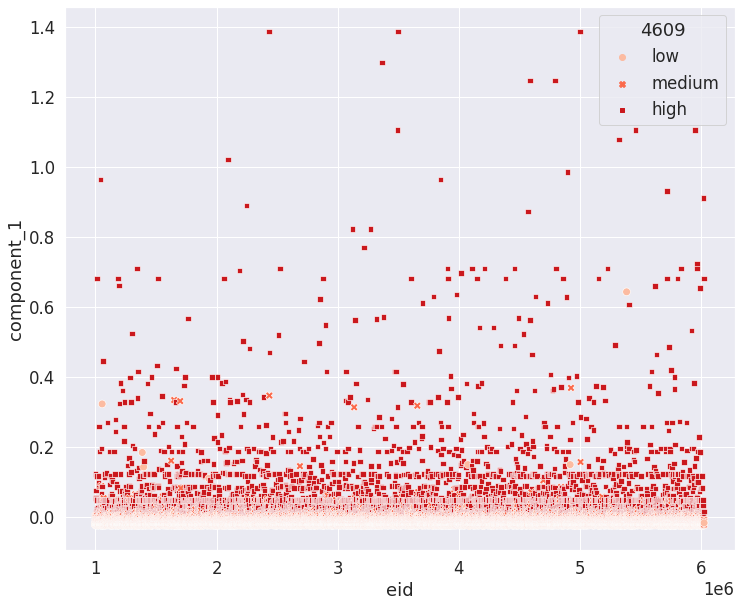

In [10]:
fig, axes = plt.subplots(figsize=(12,10))
sns_ax = sns.scatterplot(
    data=plt_df.reset_index(), 
    x="eid", y="component_1", 
    hue=fd, style=fd, 
    hue_order=["low", "medium", "high"],
    style_order=["low", "medium", "high"],
    s=60, palette="Reds", 
    ax=axes)

In [11]:
mental_health_pca_df[-10:]

,component_1,component_2,4609,5375
eid,,,,
6023370,0.681148,0.040814,high,high
6023579,-0.009611,-0.005027,medium,medium
6023790,-0.017075,0.001644,medium,medium
6024319,-0.011263,-0.000866,medium,medium
6024454,-0.008865,-0.005694,medium,medium
6024770,-0.022649,-0.000087,medium,low
6024795,-0.015186,-0.006757,medium,low
6024896,0.014589,-0.032026,high,medium
6025132,-0.014248,0.001802,medium,medium


# Multiple correspondence analysis for categorical single values

In [32]:
cat_single_df.loc[:, [20123, 20124, 20125]].dropna()

,20123,20124,20125
eid,,,


In [34]:
cat_single_df.loc[:, [5663, 5674]].corr()

,5663,5674
5663,1.000000,0.294259
5674,0.294259,1.000000


In [52]:
# for categorical singles
# select relevant fields
mental_health_selected_df = cat_single_df.loc[:, mental_health_catsingle_emotions]
# get rid of negative values
mental_health_selected_noneg_df = ut.replace_negs(mental_health_selected_df).dropna(axis=0)
# get mca components
mental_health_pca_df = ut.feature_pca(mental_health_selected_noneg_df, mental_health_selected_noneg_df)

In [53]:
fd = 1940
plt_df = mental_health_pca_df

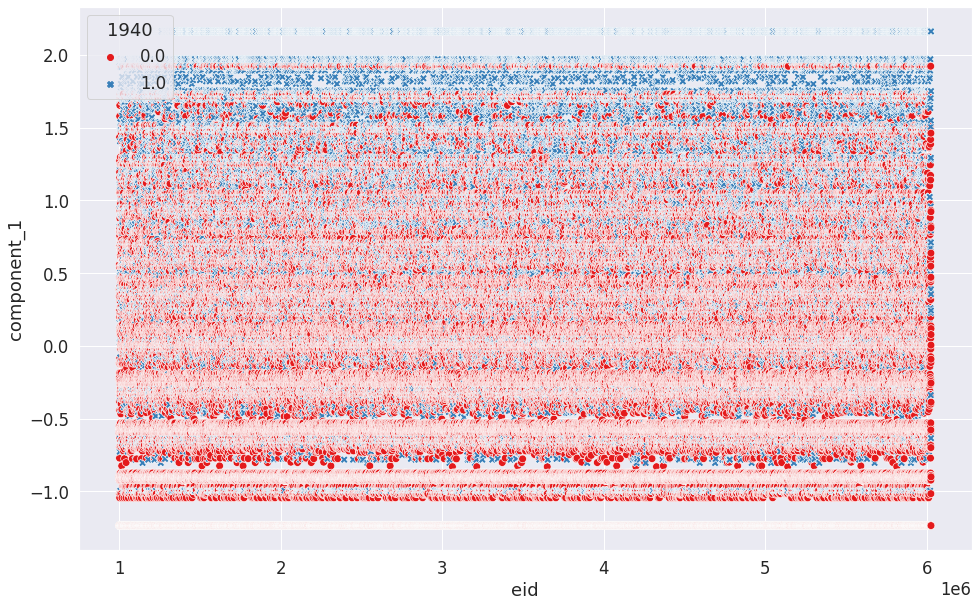

In [54]:
fig, axes = plt.subplots(figsize=(16,10))
sns_ax = sns.scatterplot(
    data=plt_df.reset_index(), 
    x="eid", y="component_1", 
    hue=fd, style=fd, 
    hue_order=sorted(plt_df.loc[:, fd].unique()),
    style_order=sorted(plt_df.loc[:, fd].unique()),
    s=60, palette="Set1", 
    ax=axes)

In [55]:
plt_df.corr().iloc[:, :1]

,component_1
component_1,1.000000e+00
component_2,-3.753098e-16
1920,7.055190e-01
1930,6.749920e-01
1940,5.200930e-01
1950,6.242915e-01
1960,6.846539e-01
1970,5.681951e-01
1980,6.495656e-01
1990,5.480915e-01


**Field types for categorical multiple, discuss their significance** 